# Diagonalization of XZX model for systems of relative low size
This notebook checks if the ground state is degenerate for OBC and non-degenerate for PBC.

In [1]:
import functions
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse.linalg import eigsh
from numpy.linalg import eigh

In [2]:
sizes = [3,4,5,6,7,8,9,10,11,12,13,14]

## Scaling of ground state level

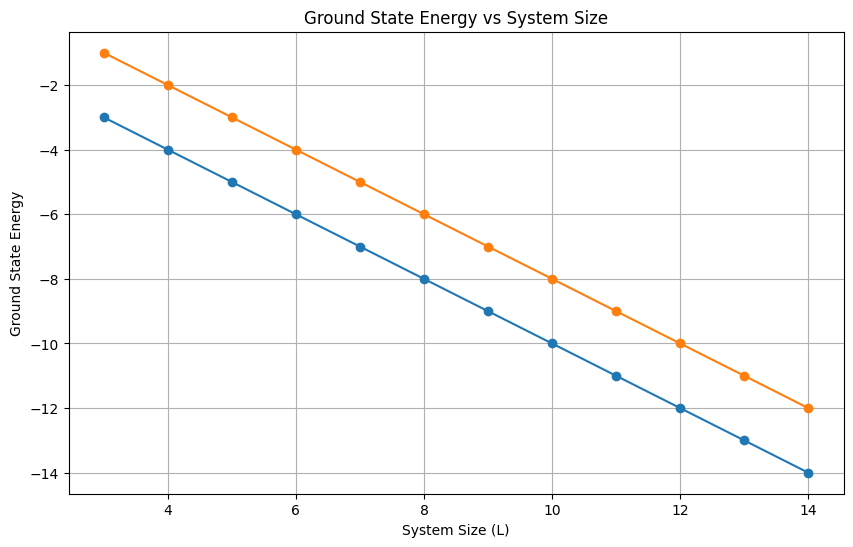

In [3]:
ground_states = []
exited_states = []

for L in sizes:
    h = functions.build_fullH(L, pbc=True, sparse=True)
    eigenvalues, _ = eigsh(h, 2, which='SA')
    ground_states.append(eigenvalues[0])
    exited_states.append(eigenvalues[1])

plt.figure(figsize=(10, 6))
plt.plot(sizes, ground_states, 'o-')
plt.plot(sizes, exited_states, 'o-')
plt.xlabel('System Size (L)')
plt.ylabel('Ground State Energy')
plt.title('Ground State Energy vs System Size')
plt.grid(True)
plt.show()

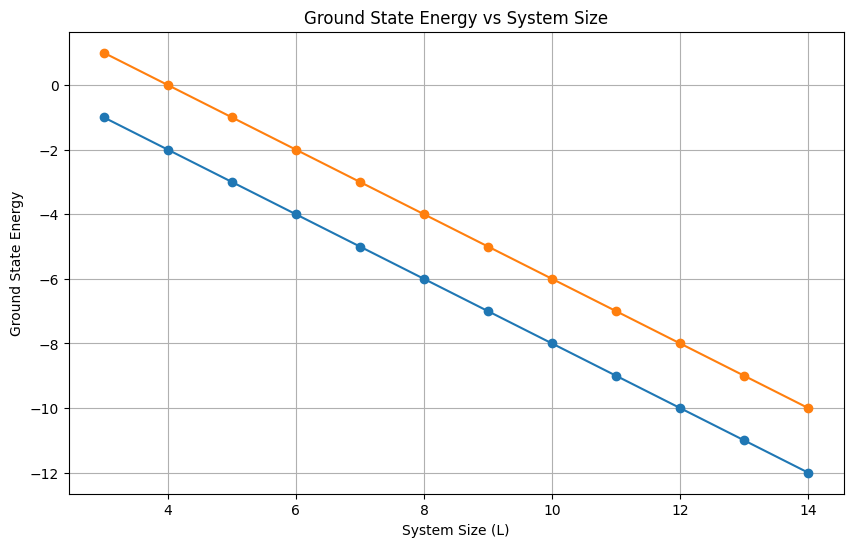

In [5]:
ground_states = []
exited_states = []

for L in sizes:
    h = functions.build_fullH(L, pbc=False, sparse=True)
    eigenvalues, _ = eigsh(h, 5, which='SA')
    ground_states.append(eigenvalues[3])
    exited_states.append(eigenvalues[4])

plt.figure(figsize=(10, 6))
plt.plot(sizes, ground_states, 'o-')
plt.plot(sizes, exited_states, 'o-')
plt.xlabel('System Size (L)')
plt.ylabel('Ground State Energy')
plt.title('Ground State Energy vs System Size')
plt.grid(True)
plt.show()

## Energy gap

In [3]:
energy_gaps = []

for L in sizes:
    h = functions.build_fullH(L, pbc=True, sparse=True)
    eigenvalues, _ = eigsh(h, 2, which='SA')
    energy_gap = eigenvalues[1] - eigenvalues[0]
    energy_gaps.append(energy_gap)

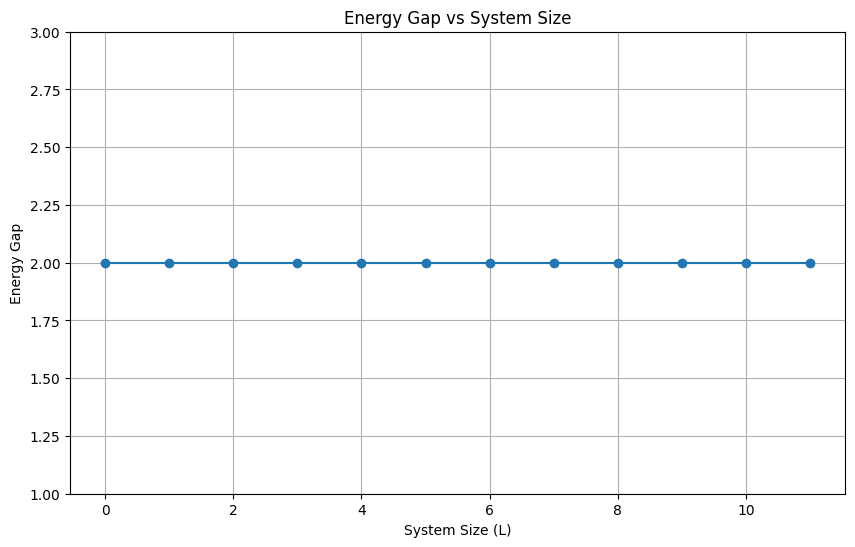

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(energy_gaps, 'o-')
plt.ylim(1, 3)
plt.xlabel('System Size (L)')
plt.ylabel('Energy Gap')
plt.title('Energy Gap vs System Size')
plt.grid(True)
plt.show()

In [9]:
energy_gaps = []

for L in sizes:
    h = functions.build_fullH(L, pbc=False, sparse=True)
    eigenvalues, _ = eigsh(h, 5, which='SA')
    energy_gap = eigenvalues[4] - eigenvalues[3]
    energy_gaps.append(energy_gap)

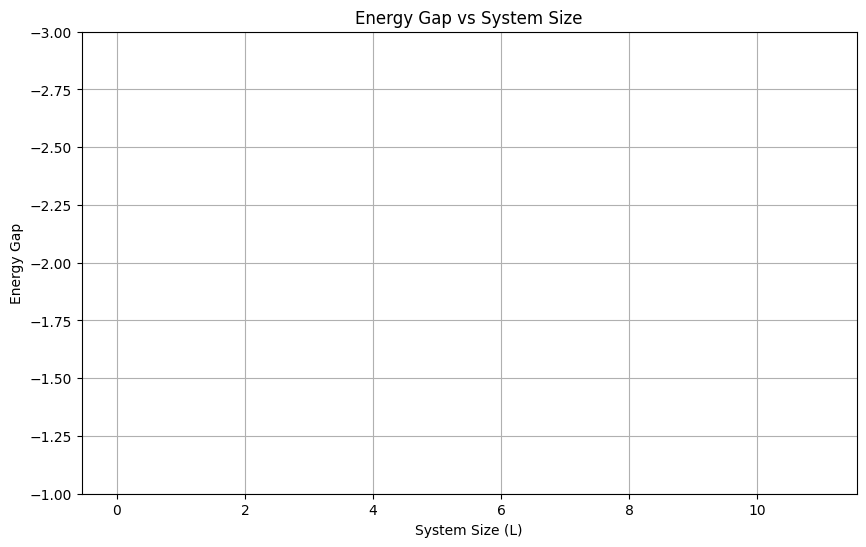

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(energy_gaps, 'o-')
plt.ylim(-1, -3)
plt.xlabel('System Size (L)')
plt.ylabel('Energy Gap')
plt.title('Energy Gap vs System Size')
plt.grid(True)
plt.show()